In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 14, 'figure.figsize': [12, 5]})

In [13]:
carbon = np.array(pd.read_csv(filepath_or_buffer="data/citylearn_challenge_2022_phase_1/carbon_intensity.csv").to_numpy())
carbon

array([[0.17072441],
       [0.15731906],
       [0.15450256],
       ...,
       [0.21550086],
       [0.20231467],
       [0.18330996]])

In [34]:
hist, bin_edges = np.histogram(carbon, bins=100, density=True)
bins = (bin_edges[:-1] + bin_edges[1:]) / 2

(mu, sigma) = stats.norm.fit(carbon)
fit_line = stats.norm.pdf(bins, mu, sigma)

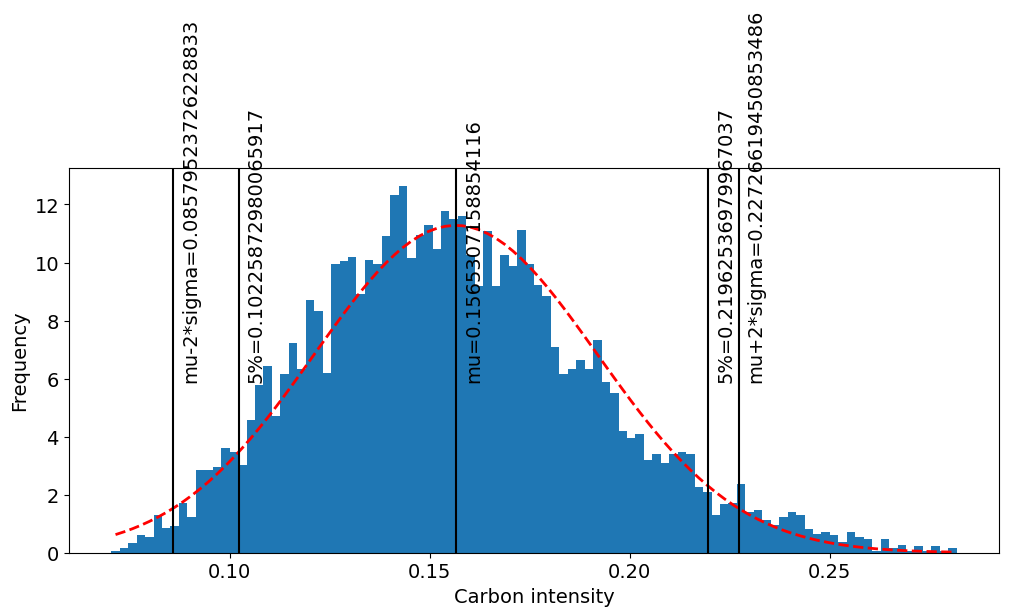

In [40]:
plt.figure()
plt.bar(bins, hist, np.diff(bin_edges))
plt.plot(bins, fit_line, 'r--', linewidth=2)
plt.xlabel("Carbon intensity")
plt.ylabel("Frequency")

plt.axvline(mu, color='k')
plt.text(mu + .002, 6, f'mu={mu}', rotation=90)

plt.axvline(mu + 2 * sigma, color='k')
plt.text(mu + 2 * sigma + .002, 6, f'mu+2*sigma={mu + 2 * sigma}', rotation=90)

plt.axvline(mu - 2 * sigma, color='k')
plt.text(mu - 2 * sigma + .002, 6, f'mu-2*sigma={mu - 2 * sigma}', rotation=90)

plt.axvline(np.percentile(carbon, 5), color='k')
plt.text(np.percentile(carbon, 5) + .002, 6, f'5%={np.percentile(carbon, 5)}', rotation=90)

plt.axvline(np.percentile(carbon, 95), color='k')
plt.text(np.percentile(carbon, 95) + .002, 6, f'5%={np.percentile(carbon, 95)}', rotation=90)

plt.show()